# Import  Dataset

In [1]:
# Importing essential libraries
import pandas as pd              # For data manipulation
import numpy as np               # For numerical operations
import matplotlib.pyplot as plt  # For plotting and visualization
import seaborn as sns            # For enhanced data visualization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

# Loading the dataset
df = pd.read_csv('Titanic-Dataset.csv')


In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Understanding Dataset

In [4]:
df.shape # provides the dimensions of the DataFrame (rows, columns)

(891, 12)

In [5]:
df.info # offers a concise overview of the DataFrame's structure and essential information

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [6]:
df.describe()#generates statistical summaries for numerical columns in the DataFrame

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#Check for null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#Check for duplicates in the dataset
df.duplicated().sum()

0

# Exploratory Data Analysis (EDA)

<Axes: xlabel='Survived', ylabel='count'>

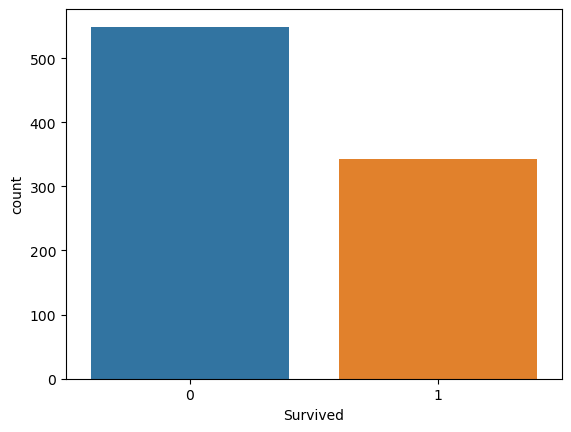

In [9]:
# Visualize the distribution of survivors
sns.countplot(x='Survived', data=df)


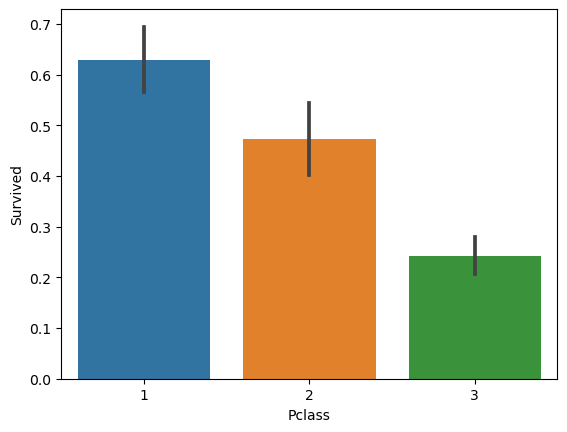

In [10]:
# Visualize the relationship between survival and other features
sns.barplot(x='Pclass', y='Survived', data=df)
plt.show()

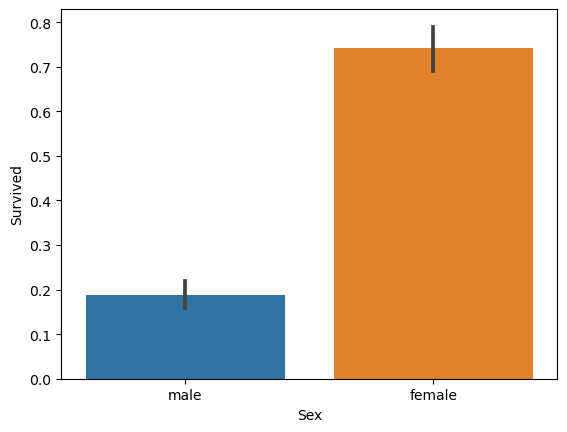

In [11]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.show()

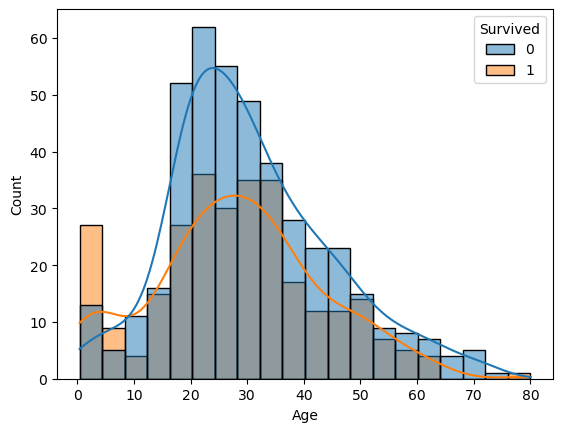

In [12]:
sns.histplot(x='Age', hue='Survived', data=df, kde=True)
plt.show()

# Data Cleaning and Feature Engieneering

In [13]:
# Fill missing Age values with the median
df['Age'].fillna(df['Age'].median(), inplace=True)

In [14]:
# Fill missing Embarked values with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [15]:
# Fill missing Fare values in the test set with the median
df['Fare'].fillna(df['Fare'].median(), inplace=True)

In [16]:
# Drop the Cabin column as it has many missing values
df.drop(columns=['Cabin'], inplace=True)


In [17]:
# Convert categorical features to numerical
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Encoding

In [18]:

# Select relevant features and target
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked']].dropna()

# Define label encoders
le_sex = LabelEncoder()
le_embarked = LabelEncoder()

# Encode categorical features (Sex and Embarked)
label_encoder = LabelEncoder()
# Encode categorical features
df['Sex'] = le_sex.fit_transform(df['Sex'])
df['Embarked'] = le_embarked.fit_transform(df['Embarked'])



In [19]:
print("Classes for 'Sex':", le_sex.classes_)
print("Classes for 'Embarked':", le_embarked.classes_)


Classes for 'Sex': [0 1]
Classes for 'Embarked': ['C' 'Q' 'S']


# Model Building and Training

In [20]:
# Define features and target variable
X = df.drop('Survived', axis=1)
y = df['Survived']
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(712, 5) (179, 5) (712,) (179,)


# Model Evaluating

##  RandomForestClassifier

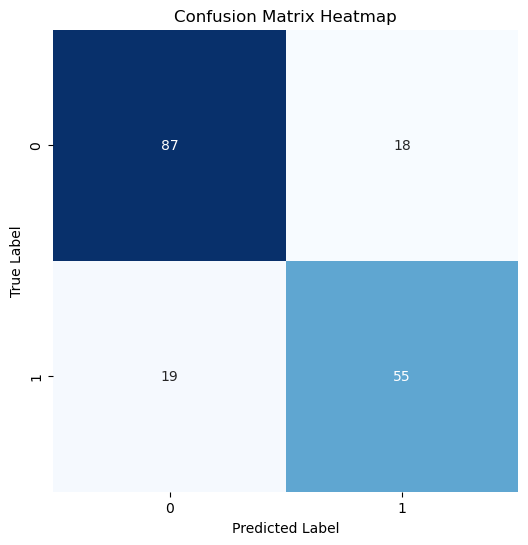


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82       105
           1       0.75      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [21]:
# Initializing the RandomForestClassifier
forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on your training data
forest_model.fit(X_train, y_train)

y_pred = forest_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a Random Forest classifier
forest_model = RandomForestClassifier(random_state=42)

# Train the model
forest_model.fit(X_train, y_train)

# Make predictions
y_pred = forest_model.predict(X_test)

# Plotting the heatmap for the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Precision, Recall, and Accuracy
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)


# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

## Support Vector Machine model


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       105
           1       0.83      0.66      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.80      0.80       179



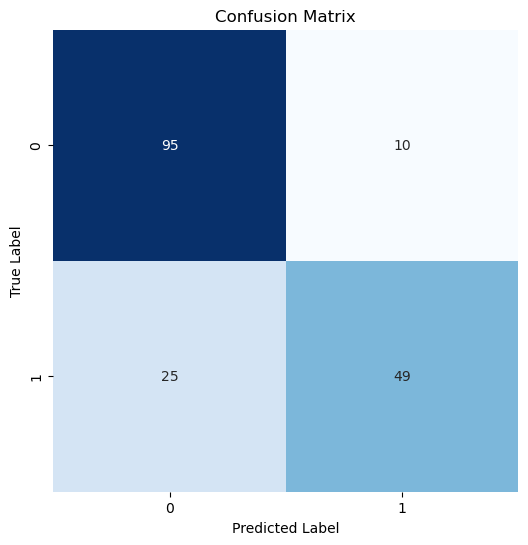

In [22]:

# Initialize the Support Vector Machine model
svm_model = SVC()

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = svm_model.predict(X_test)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# For a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## Naive Bayes classifier

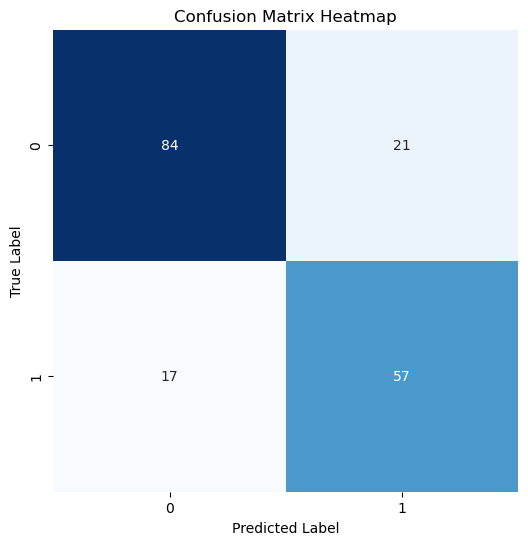


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.82       105
           1       0.73      0.77      0.75        74

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.79      0.79      0.79       179



In [24]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a Naive Bayes classifier
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions
y_pred = nb_model.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the heatmap for the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Precision, Recall, and Accuracy
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))
